In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Assignment-4.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df['Annual Income (k$)']

In [7]:
y = df['Spending Score (1-100)']

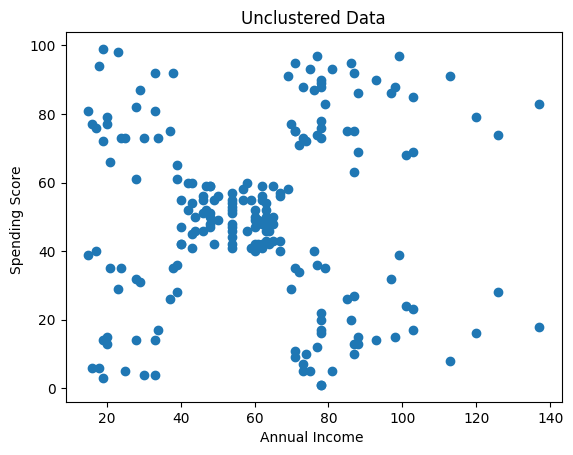

In [8]:
plt.title("Unclustered Data")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.scatter(x,y)

In [9]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [10]:
km = KMeans(n_clusters=5)

In [11]:
x = df.iloc[:,3:]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
km.fit_predict(x)

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [14]:
km.inertia_

44448.45544793371

In [15]:
sse=[]
for i in range(1,16):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    sse.append(km.inertia_)

plt.title("Elbow Method")
plt.plot(range(1,16),sse,'bo-')

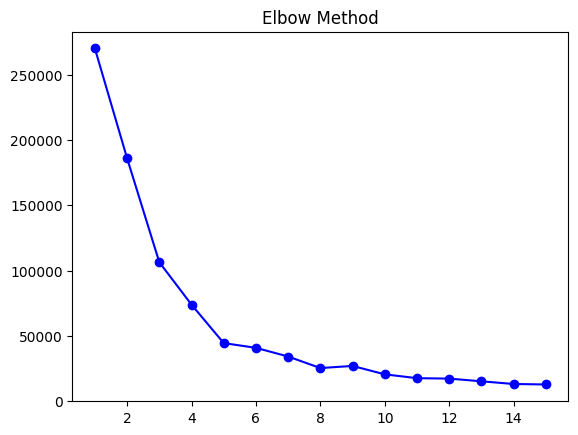

In [16]:
plt.title("Elbow Method")
plt.plot(range(1,16),sse,'bo-')

In [17]:
from sklearn.metrics import silhouette_score

In [20]:
silh=[]
for i in range (2,16):
    km = KMeans(n_clusters=i)
    labelsKM = km.fit_predict(x)
    s =  silhouette_score(x,labelsKM)
    silh.append(s)

In [21]:
silh

[0.3774913479961559,
 0.46761358158775435,
 0.42966498787642116,
 0.47567386282871527,
 0.5379675585622219,
 0.47454149296034687,
 0.4548304173653348,
 0.4565077334305076,
 0.45755309077112755,
 0.43494521030982114,
 0.41888977427621255,
 0.40198241106194305,
 0.4155461641547241,
 0.41541941975334495]

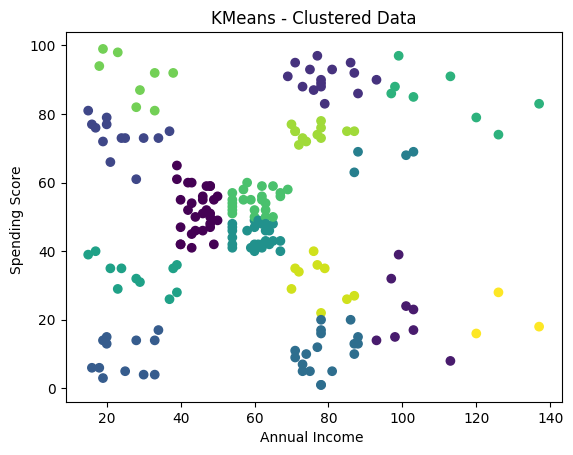

In [34]:
plt.title("KMeans - Clustered Data")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labelsKM)

6

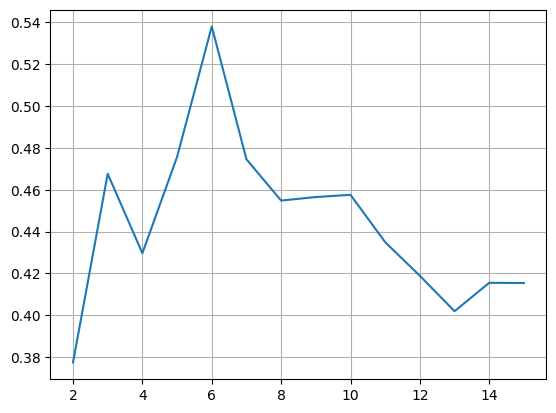

In [41]:
plt.grid()
plt.plot(range(2,16),silh)
silh.index(0.5379675585622219)+2

In [24]:
al = AgglomerativeClustering(n_clusters=5)

In [25]:
al.fit_predict(x)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [28]:
see_A =[]
for i in range(2,16):
    km = AgglomerativeClustering(n_clusters=i)
    labelsAgg = km.fit_predict(x)
    see_A.append(silhouette_score(x,labelsAgg))
    

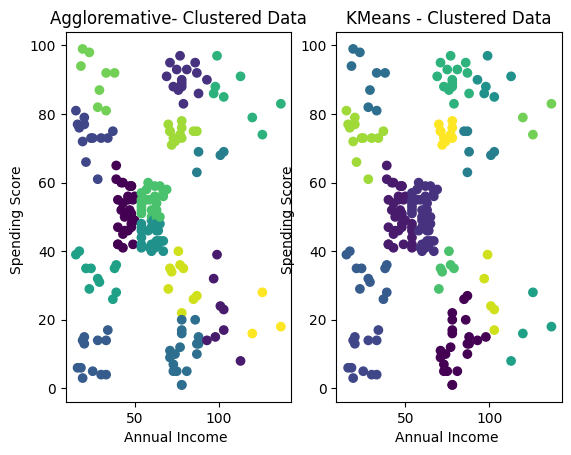

In [29]:
plt.subplot(1,2,1)

plt.title("Aggloremative- Clustered Data")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labelsKM)

plt.subplot(1,2,2)
plt.title("KMeans - Clustered Data")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labelsAgg)



In [43]:
km = KMeans(n_clusters=6)

In [50]:
l = km.fit_predict(x)

In [48]:
import seaborn as sns

In [72]:
a=[[],[],[],[],[],[]]
for i in l :
    a[i].append(i)
for i in a :
    print(i)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipykernel_90315/1562762527.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  sns.barplot([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


TypeError: list indices must be integers or slices, not tuple